In [ ]:
import numpy as np
import tensorflow.keras
# linear model
from tensorflow.keras.models import Sequential
# every neuron in the input layer is connected to each neuron in the next layer
from tensorflow.keras.layers import Dense
# adaptive learning optmization method algorithm==Stochastic gradient descent > vanilla gradient descent 
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

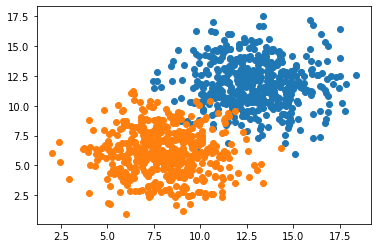

In [ ]:
# number of points to train
n_pts = 500
# to display the same random point
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), 
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), 
               np.random.normal(6, 2, n_pts)]).T

# dataset
# vstack : matrix concatenation vertically into a single one
X = np.vstack((Xa, Xb))
# print(X)
# labeling : bottom = 1, top = 0
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
# print(y)

# display points
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [ ]:
# linear model
model = Sequential()
# creating a perceptron (one layer) with 2 inputs and 1 output based on sigmoid activation function
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
# Stochastic gradient descent or error optimizer = fonction de minimisation
adam = Adam(lr = 0.1)
# loss function = fonction de coût
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# training
# verbose=1
# epoch is when a model reach the total dataset in one iteration
# epoch can be divided into batch for training optimization
# shuffle to force the gradient to go to/find the minimun value
h=model.fit(x=X, y=y, verbose=0, batch_size=50, epochs=500, shuffle='true')

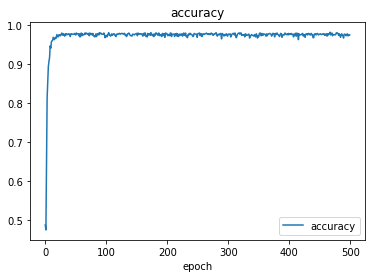

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

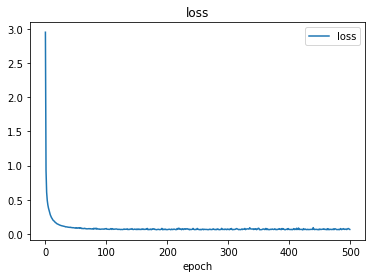

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
# display the score / prediction of the or the model results
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  # convert our point to a 50x50 matrix
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_  = xx.ravel(), yy.ravel() 
  grid = np.c_[xx_, yy_]
  # prediction
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  # different probabilities found by the model for both labels : 1 and 0
  plt.contourf(xx, yy, z)

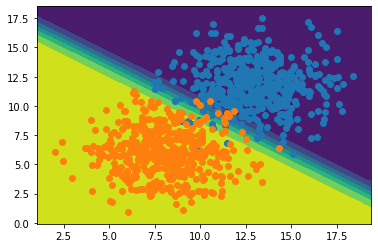

In [ ]:
plot_decision_boundary(X, y, model)
# display points
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

Prediction is: [[0.9999938]]


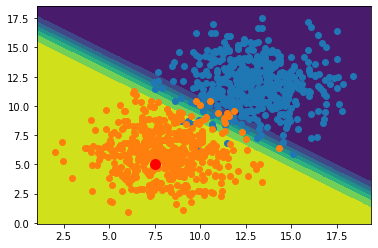

In [ ]:
plot_decision_boundary(X, y, model)
# display points
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
# display a classified single model
x = 7.5
y = 5 
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)